RF_model
---

**Date:** 5/19/2022

**Goal:** Reproduce RF model used for (GEM, AGU & ML-Helio) posters, but using the new python file

**Run-all safe:** No: model takes ~17mins to run, and there are cells at the end that will create pickle file.

------------

#### Contents:
- omni dataframe (with all rows with NaNs dropped)
- training and test set 
- RF model
    - performance evaluation (scores and density plots)
- feature importances printed
- cells to pickle the model at the end

In [1]:
#import commonly used libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns
sns.set_theme(style='darkgrid')

In [2]:
# assuming the pickle file is in the parent folder housing this folder (i.e. one folder up)
import sys, os
filename = os.path.abspath(os.path.join('..','omni_dropped_nan.pkl'))

# Unload pickled OMNI dataframe with NaN rows dropped
omni_pickle = open(filename,'rb')
dropped_df = pickle.load(omni_pickle)

In [3]:
dropped_df

,Epoch,BX_GSE,BY_GSE,BZ_GSE,Vx,Vy,Vz,proton_density,T,AE_INDEX,AL_INDEX,AU_INDEX,SYM_H,ASY_H
1,2000-01-01 00:01:00,-5.88,2.17,0.53,-662.6,7.3,-46.5,3.12,343841.0,638.0,-487.0,151.0,-45.0,48.0
2,2000-01-01 00:02:00,-5.71,3.23,1.44,-661.4,2.4,-46.3,3.24,326583.0,666.0,-527.0,139.0,-45.0,48.0
3,2000-01-01 00:03:00,-5.33,3.80,1.84,-659.8,-8.4,-56.2,3.11,306470.0,615.0,-474.0,141.0,-45.0,48.0
5,2000-01-01 00:05:00,-3.80,3.95,3.83,-684.4,-9.1,-74.1,2.55,355046.0,571.0,-424.0,147.0,-46.0,46.0
17,2000-01-01 00:17:00,-0.83,4.12,5.41,-724.7,-6.7,-98.2,2.70,450636.0,555.0,-335.0,220.0,-44.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552955,2018-02-28 23:55:00,0.33,-0.87,-1.49,-413.0,-7.4,-3.5,4.88,62495.0,47.0,-17.0,30.0,-8.0,18.0
9552956,2018-02-28 23:56:00,0.21,0.23,-1.55,-413.1,-4.7,-2.8,4.92,67848.0,43.0,-16.0,27.0,-8.0,18.0
9552957,2018-02-28 23:57:00,0.31,0.48,-1.92,-413.1,-2.5,-2.2,4.96,72261.0,47.0,-18.0,29.0,-8.0,18.0
9552958,2018-02-28 23:58:00,0.70,0.99,-1.81,-413.1,-2.5,-2.2,4.96,72261.0,52.0,-18.0,34.0,-8.0,18.0


In [4]:
# %% Import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse

In [5]:
import ML_model as mlm

In [6]:
features = ['BX_GSE','BY_GSE','BZ_GSE','AE_INDEX','AL_INDEX','AU_INDEX','SYM_H','ASY_H']
targets = ['Vx','Vy','Vz','proton_density','T']

In [7]:
%%time
X_train,X_test,y_train,y_test = mlm.train_test_dataframes(dropped_df,features,targets)

Train-Test split was: Random split
X_train & X_test have been scaled
Dataframes are complete
CPU times: total: 3.45 s
Wall time: 3.52 s


In [8]:
%%time
prediction,rf_model=mlm.vpt_ml_model(X_train,y_train,X_test,y_test,
                                     ml_model_type=RandomForestRegressor(n_estimators=10,random_state=123))

Selected Model: RandomForestRegressor(n_estimators=10, random_state=123)
model has been fitted
prediction for X_test is complete
prediction_df is complete
CPU times: total: 13min 29s
Wall time: 13min 32s


RF-rand split model (w/o Time History) Model Score: 0.5109258647528696
Model Vx Target Prediction Score: 0.5904233551303661
Mean-squared error = 4560.645074199576
Root-mean-squared error = 67.53254825785545


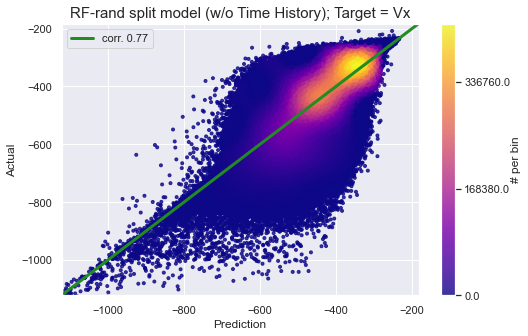

Model Vy Target Prediction Score: 0.40816865268065405
Mean-squared error = 387.77951256346097
Root-mean-squared error = 19.69211803142214


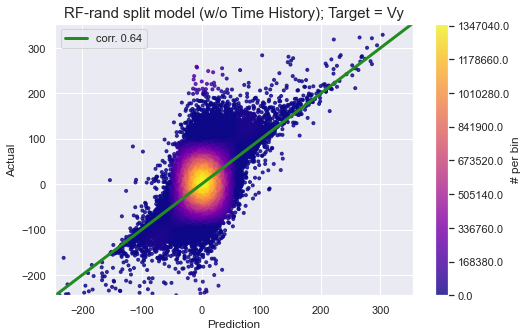

Model Vz Target Prediction Score: 0.3947111531489418
Mean-squared error = 311.4383224199926
Root-mean-squared error = 17.647615204893622


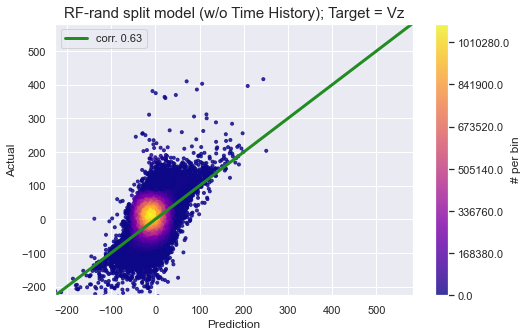

Model proton_density Target Prediction Score: 0.6392789301794171
Mean-squared error = 8.932127800471475
Root-mean-squared error = 2.9886665589308343


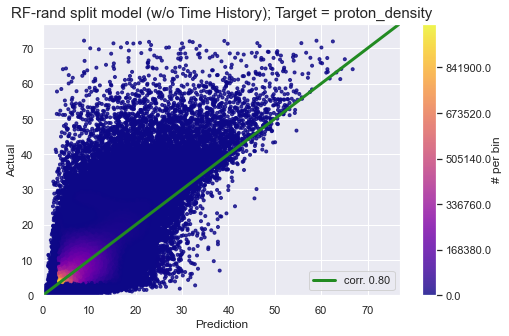

Model T Target Prediction Score: 0.5220472326249688
Mean-squared error = 4623912696.480563
Root-mean-squared error = 67999.35805932703


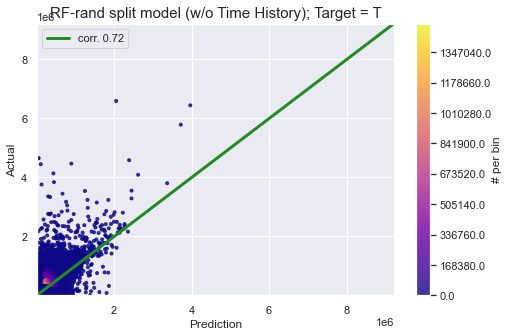

CPU times: total: 2min 11s
Wall time: 2min 11s


In [9]:
%%time
mlm.collective_performance_analysis(y_test,prediction,'RF-rand split model (w/o Time History)')

In [10]:
for i in range(len(features)):
    print(features[i], ':',rf_model.feature_importances_[i])

BX_GSE : 0.1347175807341706
BY_GSE : 0.14995747991952085
BZ_GSE : 0.12678719908408959
AE_INDEX : 0.18586183772644607
AL_INDEX : 0.07538270694390803
AU_INDEX : 0.09618534933611946
SYM_H : 0.13098275327315476
ASY_H : 0.10012509298259062


## Create pickle of RF model

In [11]:
with open('rf_model.pkl','wb') as f:
    pickle.dump(rf_model,f)

In [12]:
%%time 
rf_pkl = open('rf_model.pkl','rb')
rf_modelpkl = pickle.load(rf_pkl)

CPU times: total: 14.9 s
Wall time: 17 s


In [13]:
rf_modelpkl

RandomForestRegressor(n_estimators=10, random_state=123)

In [14]:
rf_modelpkl.feature_importances_

array([0.13471758, 0.14995748, 0.1267872 , 0.18586184, 0.07538271,
       0.09618535, 0.13098275, 0.10012509])